In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prophet


%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

Load Data

In [2]:
def load_data(path='C:\\Users\\Oluwajuwon\\Documents\\Smart Systems\\Projects\\Data Science Projects\\combined_data.csv'):
    return pd.read_csv(path)

In [3]:
meters = load_data()
meters.head()

,Unnamed: 0,meter_id,w_timestamp,current,voltage,frequency,power_factor,energy,real_power,reactive_power,apparent_power,tita,hour,time_diff
0,0,OND023,2022-07-12 13:57:30.449294+00:00,0.79,210.1,50.1,0.75,NaN,0.124484,0.109785,0.165979,41.409622,14,0.009675
1,1,OND023,2022-07-12 13:58:42.793010+00:00,0.80,210.6,50.0,0.75,0.002539,0.126360,0.111439,0.168480,41.409622,14,0.009675
2,2,OND023,2022-07-12 14:00:28.080361+00:00,0.85,208.3,50.0,0.74,0.003832,0.131021,0.119088,0.177055,42.268584,15,0.009675
3,3,OND023,2022-07-12 14:01:00.914557+00:00,0.74,208.5,50.0,0.76,0.001069,0.117260,0.100277,0.154290,40.535802,15,0.009675
4,4,OND023,2022-07-12 14:01:34.931821+00:00,0.74,208.1,49.9,0.76,0.001106,0.117035,0.100084,0.153994,40.535802,15,0.009675


In [4]:
meters.shape

(306708, 14)

In [5]:
meters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306708 entries, 0 to 306707
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      306708 non-null  int64  
 1   meter_id        306708 non-null  object 
 2   w_timestamp     306708 non-null  object 
 3   current         306708 non-null  float64
 4   voltage         306708 non-null  float64
 5   frequency       306708 non-null  float64
 6   power_factor    306708 non-null  float64
 7   energy          306705 non-null  float64
 8   real_power      306708 non-null  float64
 9   reactive_power  306708 non-null  float64
 10  apparent_power  306708 non-null  float64
 11  tita            306708 non-null  float64
 12  hour            306708 non-null  int64  
 13  time_diff       306708 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 32.8+ MB


In [6]:
on23 = meters[meters['meter_id'] == "OND023"]
oy21 = meters[meters['meter_id'] == "OYO021"]
on21 = meters[meters['meter_id'] == "OND021"]
on24 = meters[meters['meter_id'] == "OND024"]

In [7]:
def clean(df):
    df = df.copy().dropna(axis='index')
    df = df.drop(columns=['Unnamed: 0','meter_id','tita','hour','time_diff'])
    df = df.rename(columns={'w_timestamp':'timestamp'})
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    return df

In [8]:
df = clean(on23)

In [9]:
df_energy = df[['timestamp','energy']]
df_energy

,timestamp,energy
1,2022-07-12 13:58:42.793010+00:00,0.002539
2,2022-07-12 14:00:28.080361+00:00,0.003832
3,2022-07-12 14:01:00.914557+00:00,0.001069
4,2022-07-12 14:01:34.931821+00:00,0.001106
5,2022-07-12 14:02:10.738666+00:00,0.001164
...,...,...
161079,2022-10-22 21:35:34.272836+00:00,0.003651
161080,2022-10-22 21:36:08.484019+00:00,0.003300
161081,2022-10-22 21:36:43.545834+00:00,0.003368
161082,2022-10-22 21:38:28.735422+00:00,0.007590


In [10]:
data_len = len(df_energy)
test_size = int(0.2*data_len)
train = df_energy[:-test_size]
test = df_energy[-test_size:]

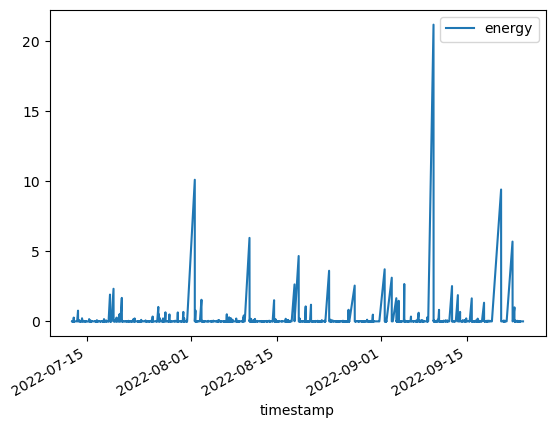

In [11]:
train.set_index('timestamp').plot();

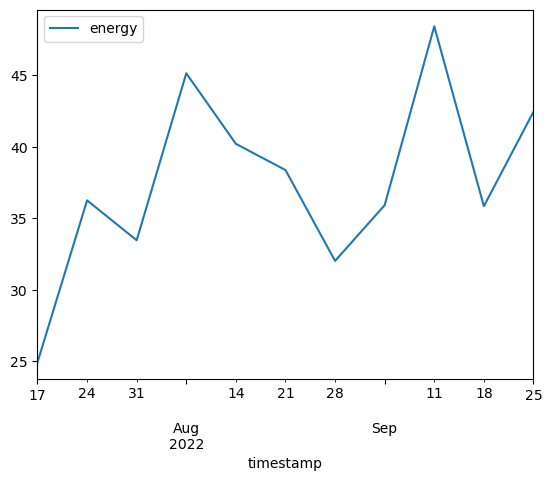

In [12]:
train.set_index('timestamp').resample('W').sum().plot();

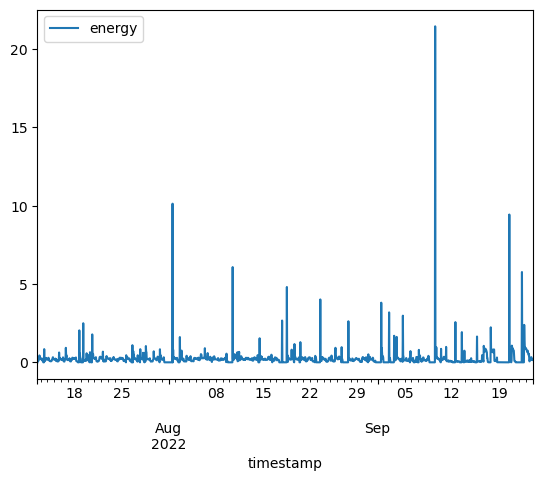

In [15]:
train.set_index('timestamp').resample('H').sum().plot(legend=True);

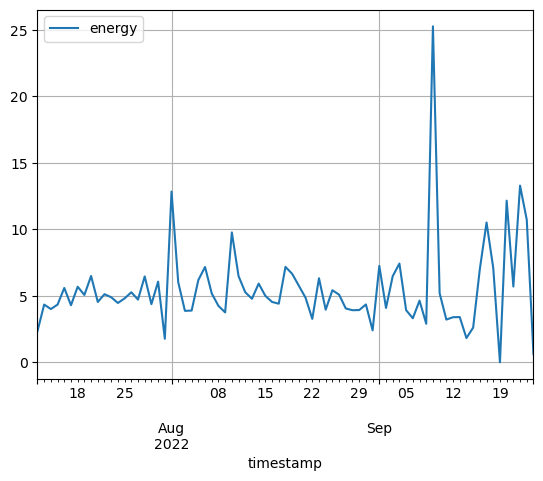

In [16]:
train.set_index('timestamp').resample('D').sum().plot(grid=True);